<a href="https://colab.research.google.com/github/eeshahar/data-science/blob/main/EeshHariU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dropout rate amongst college students ❗**

**Context:** The purpose of this project is to highlight the amount of students who dropout of secondary school, or college. The data comes from UC Irvine's Machine Learning Repository and the dataset is titled 'Predict Students' Dropout and Academic Success.' The dataset contained over 30 features such as gender and parent's occupation, but I focued on whether a student dropped out or graduated. Initially, the dataset would classify the student as 'enrolled,' 'dropped out,' and 'graduated,' but, enrolled wasn't specific enough so I removed all instances of that. In the end, the data I used was 3931 students.

*   Link to dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success




In [ ]:
!pip install preliz
#must be installed


In [ ]:
import preliz as pz

In [ ]:
import numpy as np
import arviz as az
import pymc as pm
#more necessary libraries that didn't have to be installed

**Prior:** an initial probability distribution or belief about a parameter, established before new data is observed or collected. It's built from assumptions and helps to make predictions. (so we don't use any data for these models. just guesses)


*   Based on how many students I think drop out of college, I'd assume that more kids graduate than don't
*   I did mine 50:10, which means that in a group of 60 students, I think that 50 graduate and 10 don't

*   I made a mistake in making my prior this strong. It means that I was very confident in my prediction, which ended up being wrong.





<Axes: >

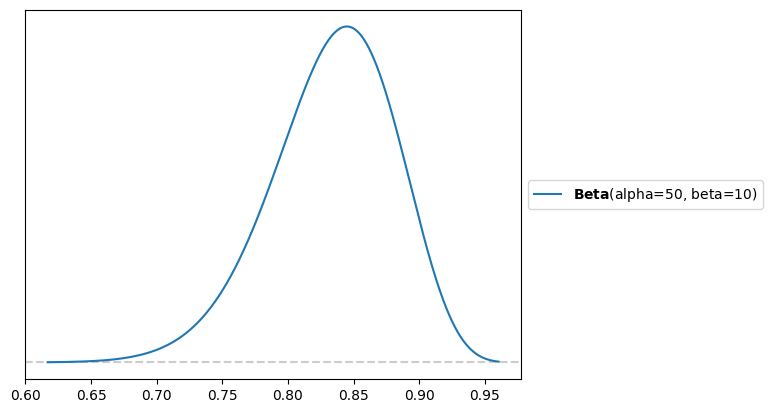

In [ ]:

#This is my prior with how many people I think have dropped out of college.
pz.Beta(alpha=50,beta=10).plot_pdf()
#the ratio of people I think graduated to people I think dropped out is 5:1

In [ ]:
#prior information
alpha_old = 50
beta_old = 10

k = 50 #grads
n = 60 #total students

analytic_FT = pz.Beta(alpha = alpha_old + k,beta = beta_old + n - k )

analytic_FT.mean()

np.float64(0.8333333333333334)

In [ ]:
import pymc as pm
#Python package for Bayesian statistical modeling

**Likelihood:** The likelihood uses data to update it's prior beliefs whereas the prior is initial assumptions before data is involved.


*  students who graduated: 2209
*  students who didn't graduate (dropout): 1422
*   As you can see, its a lot more equal than 50:10





In [ ]:
#the students who successfully graduated
FT_makes = np.repeat(1, 2209)

#the students who dropped out
FT_misses = np.repeat(0, 1422)

#combine all students into one array
FT_data = np.concatenate( [FT_makes,FT_misses] )


In [ ]:
with pm.Model() as wmby_FT_model:
  θ = pm.Beta('θ' , alpha = 2209. , beta = 1422.)

  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  idata_FT = pm.sample()


In [ ]:
import arviz as az

<Axes: title={'center': 'θ'}>

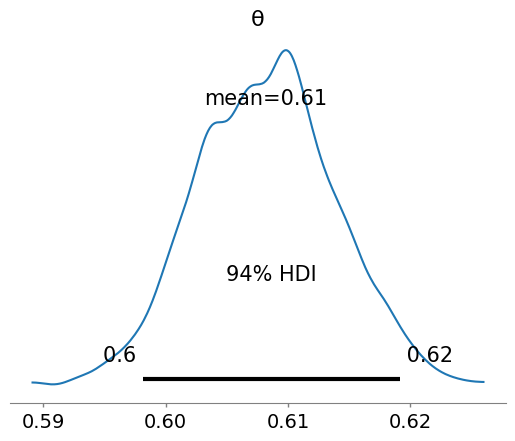

In [ ]:
az.plot_posterior(idata_FT)


**Analysis:**


*   x-axis: represents all the possible values for the true proportion of students who graduate. 0.0 means 0% of students graduate (everyone drops out), and 1.0 means 100% of students graduate.
*   y-axis: the probability of each value on the x-axis. A higher density means that that particular graduation proportion is more likely.

This graph shows that only about 64% of students graduated. This is different than my prior, which was 50:10, or 83%, because it's a lot lower than I thought it would be.





**Predicting the future:**


In [ ]:
FT_data_2324 = np.repeat([1,0], repeats = [292,75])


In [ ]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before
  θ = pm.Beta('θ' , alpha = 50. , beta = 10.)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

In [ ]:
pm.sample_posterior_predictive(idata_FT_2324, model=wmby_FT_2324_model, extend_inferencedata=True)


In [ ]:
stacked_FT_2324 = az.extract(idata_FT_2324, group="posterior_predictive")


In [ ]:
stacked_FT_2324.sel(sample=0).sel(draw=0).y.to_series().values


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Each number in the array represents the outcome for one student:

*   A value of 1 signifies a student who graduated.

*   A value of 0 signifies a student who dropped out.

This data is used by the model to update the initial belief (the prior) and determine the final outcome probabilities (the posterior).



I learned that a lot more kids drop out of college than I thought. Initially, I thought this to be pretty surprising because I thought that if you go out of your way to attend college, then obviously you'd want to be there. Upon more thought, I realized that some people may get to college just to realize that they didn't enjoy it, which balances it out. A lot of the times people have side gigs while they're attending college and when those start to take off college floats to the back of their minds and leads them to dropout.